<h1><center>Generative Adversarial Nets </center></h1>

## Table of Contents
* [1. Adversarial ML](#1.-Adversarial-ML)
* [2. Introduction to GAN](#2.-Introduction-to-GAN)
    * [2.1 Discriminative algorithms](#2.1-Discriminative-algorithms)
    * [2.2 Generative algorithms](#2.2-Generative-algorithms)  
        * [2.2.1 Generative Adversarial Networks](#2.2.1-Generative-Adversarial-Networks)
* [3. Hands on with Generative Adversarial networks](#3.-Hands-on-with-Generative-Adversarial-networks)
* [4. Deep Convolutional Generative Adversarial Networks](#4.-Deep-Convolutional-Generative-Adversarial-Networks)


## 1. Adversarial ML

**Adversarial ML** is a research field that causes a state-of-the-art neural network to mis-classify any input image to whatever class we choose. This is done simply by adding a small amount of 'specialized' noise to the input image. The changes are imperceptible to humans, but it fools the neural network.

For instance, in the below image of Willy Wonka, the Inception model originally classified the image as 'sunglasses' (score 31.48%). But once we added adversarial noise, the Inception model classifies the image as a 'bookcase' (score 99.03%).


An adversarial example is a sample of input data which has been modified very slightly in a way that is intended to cause a machine learning classifier to misclassify it. In many cases, these modifications can be so subtle that a human
observer does not even notice the modification at all, yet the classifier still makes a mistake. 

This is a very serious problem! Adversarial examples pose security concerns because they could be used to perform an attack on machine learning systems, even if the adversary has no access to the underlying model. Imagine what would happen if a self-driving car ignores a stop-sign or a person crossing the road because its neural networks have mis-classified the input images.



## 2. Introduction to GAN

##### Analogy to GAN

Let's take a theoretical example of the process of **money counterfeiting**. In this process, we can imagine two types agents: **a criminal and cop**. Let us look into their competing objectives:

* **Criminal's Objective**: The main objective of the criminal is to come up with complex ways of counterfeiting money such that the Cop cannot distinguish between counterfeited money and real money.
* **Cop's Objective**: The main objective of the cop is to come up with complex ways so as to distinguish between counterfeited money and real money.

As this process progresses the cop develops more and more sophisticated technology to detect money counterfeiting and criminal develops more and more sophisticated technology to counterfeit money. This is the basis of what is called an **Adversarial Process**.

Generative Adversarial Networks take advantage of Adversarial Processes to train two Neural Networks who compete with each other until a desirable equilibrium is reached.



### 2.1 Discriminative algorithms


Classification algorithms that constructs decision boundaries that separates classes are called **Discriminative models**. Discriminative algorithms try to classify input data; that is, given the features of a data instance, they predict a label or category to which that data belongs. 


Discriminative algorithms **map features to labels**. 



### 2.2 Generative algorithms

Generative algorithms performs the functionality of attempting to **predict features given a certain label**. They aim at learning the true data distribution of the training set so as to generate new data points with some variations. 


### 2.2.1 Generative Adversarial Networks

GAN’S are generative models that will learn the distribution of data to generate new points. GANs were first invented by Ian Goodfellow in 2014. 

Imagine a random image(sampled from gaussian distribution) sent through a neural network.The output of the network is also of same size(image).Now if we could tell the network to tweak it’s parameters until the output image is close to our reference image but different,we get a generative model.


This is based on game theory and has two players or networks: a generator network and b) a discriminator network, both competing against each other. This dual network game theory-based approach vastly improved the process of learning from unlabeled data. 

The **generator network produces fake data** and passes it to a discriminator. The discriminator network also sees real data and predicts whether the data it receives is fake or real. So, the generator is trained so that it can easily produce data that is very close to real data in order to fool the discriminator network. 
The discriminator network is trained to classify which data is real and which data is fake. **So, eventually, a generator network learns to produce data that is very, very close to real data.**

## 3. Hands-on with Generative Adversarial networks

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

C:\Users\MS00420757\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)

# The dimension of our random noise vector.
random_dim = 100

### 3.1 Load Input data

In [ ]:
# Create a function to load MNIST data 
def load_minst_data():
    # load the data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # normalize our inputs to be in the range[-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    # convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

### 3.2 Define an optimizer

Let us use the Adam optimizer for both generator as well as discriminator.

In [ ]:
# Define an Adam optimizer
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

### 3.3 Training a GAN Model

Most machine learning models are based on optimization, that is, we **minimize the cost function** over its parameter space. 
GANs are different because of two networks: the **generator G and the discriminator D**. Each has its own cost. An easy way to visualize GAN is the cost of the discriminator is the negative of the cost of the generator. 

In GAN, we can define a value function that the generator has to minimize and the discriminator has to maximize. The training process for a generative model is quite different from the supervised training method. 

**The blue line for backpropagation should go to generator as well as discriminator
<p align="center">
    <img src="gan.png" alt="neofetch" align="middle" width="300px">
</p>

GAN is sensitive to the initial weights. So we need to use batch normalization. Batch normalization makes the model stable, besides improving performance. Here, we train two models, the generative model and the discriminative model, simultaneously. 

Generative model G captures data distribution and discriminative model D estimates the probability of a sample that came from training data rather than G.

#### 3.3.1 Define the generator network

For both the generator and discriminator, create a neural network with three hidden layers with the activation function being the Leaky Relu. We also add dropout layers for the discriminator to improve its robustness on unseen images.

In [23]:
# Initialize with input data of generator with Random normal distribution of standard deviation 0.02

def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

#### 3.3.2 Define the discriminator network

In [24]:
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

#### 3.3.2 Combine discriminator and generator networks to create a GAN 

In [25]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    
    # We initially set trainable to False since we only want to train either the
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    # the output of the generator (an image)
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

#### 3.3.3 Train a GAN

In [28]:
def simple_train(epochs=1, batch_size=128):
    
    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] // batch_size

    # Build our GAN netowrk
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batch_count)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)


#### 3.3.4 Create a plot of generated images

In [ ]:
# Create a wall of generated MNIST images
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

--------------- Epoch 1 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.56it/s]


--------------- Epoch 2 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.97it/s]


--------------- Epoch 3 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.88it/s]


--------------- Epoch 4 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


--------------- Epoch 5 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.52it/s]


--------------- Epoch 6 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.06it/s]


--------------- Epoch 7 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:29<00:00,  5.23it/s]


--------------- Epoch 8 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


--------------- Epoch 9 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.91it/s]


--------------- Epoch 10 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


--------------- Epoch 11 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.92it/s]


--------------- Epoch 12 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.05it/s]


--------------- Epoch 13 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.82it/s]


--------------- Epoch 14 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:31<00:00,  5.13it/s]


--------------- Epoch 15 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.64it/s]


--------------- Epoch 16 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


--------------- Epoch 17 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.05it/s]


--------------- Epoch 18 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


--------------- Epoch 19 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.92it/s]


--------------- Epoch 20 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.95it/s]


--------------- Epoch 21 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


--------------- Epoch 22 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.90it/s]


--------------- Epoch 23 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


--------------- Epoch 24 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.02it/s]


--------------- Epoch 25 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


--------------- Epoch 26 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.37it/s]


--------------- Epoch 27 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:30<00:00,  5.20it/s]


--------------- Epoch 28 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


--------------- Epoch 29 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.45it/s]


--------------- Epoch 30 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.06it/s]


--------------- Epoch 31 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.07it/s]


--------------- Epoch 32 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.41it/s]


--------------- Epoch 33 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.19it/s]


--------------- Epoch 34 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.99it/s]


--------------- Epoch 35 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.66it/s]


--------------- Epoch 36 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 37 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 38 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.72it/s]


--------------- Epoch 39 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.78it/s]


--------------- Epoch 40 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.83it/s]


--------------- Epoch 41 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.83it/s]


--------------- Epoch 42 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.70it/s]


--------------- Epoch 43 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.69it/s]


--------------- Epoch 44 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 45 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.73it/s]


--------------- Epoch 46 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.77it/s]


--------------- Epoch 47 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 48 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 49 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.93it/s]


--------------- Epoch 50 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.87it/s]


--------------- Epoch 51 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 52 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.84it/s]


--------------- Epoch 53 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 54 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.89it/s]


--------------- Epoch 55 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.87it/s]


--------------- Epoch 56 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.79it/s]


--------------- Epoch 57 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.79it/s]


--------------- Epoch 58 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.82it/s]


--------------- Epoch 59 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 60 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.85it/s]


--------------- Epoch 61 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.85it/s]


--------------- Epoch 62 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.93it/s]


--------------- Epoch 63 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.94it/s]


--------------- Epoch 64 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.86it/s]


--------------- Epoch 65 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.88it/s]


--------------- Epoch 66 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.87it/s]


--------------- Epoch 67 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.93it/s]


--------------- Epoch 68 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.89it/s]


--------------- Epoch 69 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.88it/s]


--------------- Epoch 70 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 71 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.81it/s]


--------------- Epoch 72 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.85it/s]


--------------- Epoch 73 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.72it/s]


--------------- Epoch 74 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 75 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.84it/s]


--------------- Epoch 76 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.94it/s]


--------------- Epoch 77 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 78 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.68it/s]


--------------- Epoch 79 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.85it/s]


--------------- Epoch 80 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.88it/s]


--------------- Epoch 81 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.78it/s]


--------------- Epoch 82 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.82it/s]


--------------- Epoch 83 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.92it/s]


--------------- Epoch 84 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.95it/s]


--------------- Epoch 85 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.88it/s]


--------------- Epoch 86 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.95it/s]


--------------- Epoch 87 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.83it/s]


--------------- Epoch 88 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.60it/s]


--------------- Epoch 89 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 90 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 91 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.89it/s]


--------------- Epoch 92 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.65it/s]


--------------- Epoch 93 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.44it/s]


--------------- Epoch 94 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.56it/s]


--------------- Epoch 95 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.71it/s]


--------------- Epoch 96 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.20it/s]


--------------- Epoch 97 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.20it/s]


--------------- Epoch 98 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.18it/s]


--------------- Epoch 99 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.54it/s]


--------------- Epoch 100 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.89it/s]


--------------- Epoch 101 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.95it/s]


--------------- Epoch 102 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.67it/s]


--------------- Epoch 103 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.05it/s]


--------------- Epoch 104 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.85it/s]


--------------- Epoch 105 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


--------------- Epoch 106 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


--------------- Epoch 107 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


--------------- Epoch 108 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


--------------- Epoch 109 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


--------------- Epoch 110 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.03it/s]


--------------- Epoch 111 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.10it/s]


--------------- Epoch 112 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.03it/s]


--------------- Epoch 113 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 114 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.03it/s]


--------------- Epoch 115 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.98it/s]


--------------- Epoch 116 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.81it/s]


--------------- Epoch 117 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.02it/s]


--------------- Epoch 118 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.98it/s]


--------------- Epoch 119 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.07it/s]


--------------- Epoch 120 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.16it/s]


--------------- Epoch 121 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.33it/s]


--------------- Epoch 122 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.56it/s]


--------------- Epoch 123 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.87it/s]


--------------- Epoch 124 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.86it/s]


--------------- Epoch 125 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.87it/s]


--------------- Epoch 126 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.87it/s]


--------------- Epoch 127 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.75it/s]


--------------- Epoch 128 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.51it/s]


--------------- Epoch 129 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.66it/s]


--------------- Epoch 130 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.77it/s]


--------------- Epoch 131 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.48it/s]


--------------- Epoch 132 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.82it/s]


--------------- Epoch 133 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.46it/s]


--------------- Epoch 134 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.73it/s]


--------------- Epoch 135 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.37it/s]


--------------- Epoch 136 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


--------------- Epoch 137 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.57it/s]


--------------- Epoch 138 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.12it/s]


--------------- Epoch 139 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.49it/s]


--------------- Epoch 140 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.09it/s]


--------------- Epoch 141 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.25it/s]


--------------- Epoch 142 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.93it/s]


--------------- Epoch 143 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.35it/s]


--------------- Epoch 144 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.04it/s]


--------------- Epoch 145 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.32it/s]


--------------- Epoch 146 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.84it/s]


--------------- Epoch 147 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.86it/s]


--------------- Epoch 148 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.94it/s]


--------------- Epoch 149 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.49it/s]


--------------- Epoch 150 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.17it/s]


--------------- Epoch 151 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.18it/s]


--------------- Epoch 152 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.07it/s]


--------------- Epoch 153 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.94it/s]


--------------- Epoch 154 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.08it/s]


--------------- Epoch 155 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.28it/s]


--------------- Epoch 156 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.18it/s]


--------------- Epoch 157 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.17it/s]


--------------- Epoch 158 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.91it/s]


--------------- Epoch 159 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.14it/s]


--------------- Epoch 160 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.12it/s]


--------------- Epoch 161 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.99it/s]


--------------- Epoch 162 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.21it/s]


--------------- Epoch 163 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.06it/s]


--------------- Epoch 164 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


--------------- Epoch 165 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.07it/s]


--------------- Epoch 166 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.94it/s]


--------------- Epoch 167 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.05it/s]


--------------- Epoch 168 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.98it/s]


--------------- Epoch 169 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


--------------- Epoch 170 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.00it/s]


--------------- Epoch 171 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.18it/s]


--------------- Epoch 172 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.96it/s]


--------------- Epoch 173 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.24it/s]


--------------- Epoch 174 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.02it/s]


--------------- Epoch 175 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.39it/s]


--------------- Epoch 176 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.72it/s]


--------------- Epoch 177 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.97it/s]


--------------- Epoch 178 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 179 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.78it/s]


--------------- Epoch 180 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.85it/s]


--------------- Epoch 181 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.92it/s]


--------------- Epoch 182 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.04it/s]


--------------- Epoch 183 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  6.99it/s]


--------------- Epoch 184 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.08it/s]


--------------- Epoch 185 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.02it/s]


--------------- Epoch 186 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.04it/s]


--------------- Epoch 187 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.81it/s]


--------------- Epoch 188 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.04it/s]


--------------- Epoch 189 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.04it/s]


--------------- Epoch 190 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.96it/s]


--------------- Epoch 191 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.89it/s]


--------------- Epoch 192 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.84it/s]


--------------- Epoch 193 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.41it/s]


--------------- Epoch 194 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.86it/s]


--------------- Epoch 195 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 196 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.84it/s]


--------------- Epoch 197 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 198 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.02it/s]


--------------- Epoch 199 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.44it/s]


--------------- Epoch 200 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.14it/s]


--------------- Epoch 201 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.42it/s]


--------------- Epoch 202 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.58it/s]


--------------- Epoch 203 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.05it/s]


--------------- Epoch 204 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.82it/s]


--------------- Epoch 205 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 206 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.86it/s]


--------------- Epoch 207 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 208 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.66it/s]


--------------- Epoch 209 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.43it/s]


--------------- Epoch 210 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.97it/s]


--------------- Epoch 211 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.94it/s]


--------------- Epoch 212 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.01it/s]


--------------- Epoch 213 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.98it/s]


--------------- Epoch 214 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.06it/s]


--------------- Epoch 215 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.01it/s]


--------------- Epoch 216 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.06it/s]


--------------- Epoch 217 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.62it/s]


--------------- Epoch 218 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  6.99it/s]


--------------- Epoch 219 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.06it/s]


--------------- Epoch 220 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.98it/s]


--------------- Epoch 221 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.04it/s]


--------------- Epoch 222 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.06it/s]


--------------- Epoch 223 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.07it/s]


--------------- Epoch 224 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:05<00:00,  7.11it/s]


--------------- Epoch 225 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.04it/s]


--------------- Epoch 226 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.03it/s]


--------------- Epoch 227 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.00it/s]


--------------- Epoch 228 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.79it/s]


--------------- Epoch 229 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  6.99it/s]


--------------- Epoch 230 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.06it/s]


--------------- Epoch 231 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.09it/s]


--------------- Epoch 232 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.76it/s]


--------------- Epoch 233 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.92it/s]


--------------- Epoch 234 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.06it/s]


--------------- Epoch 235 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.05it/s]


--------------- Epoch 236 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.03it/s]


--------------- Epoch 237 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.00it/s]


--------------- Epoch 238 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.08it/s]


--------------- Epoch 239 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.95it/s]


--------------- Epoch 240 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:05<00:00,  7.10it/s]


--------------- Epoch 241 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.93it/s]


--------------- Epoch 242 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.02it/s]


--------------- Epoch 243 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.79it/s]


--------------- Epoch 244 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.90it/s]


--------------- Epoch 245 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.01it/s]


--------------- Epoch 246 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.06it/s]


--------------- Epoch 247 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.36it/s]


--------------- Epoch 248 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.07it/s]


--------------- Epoch 249 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.23it/s]


--------------- Epoch 250 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.29it/s]


--------------- Epoch 251 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.32it/s]


--------------- Epoch 252 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.31it/s]


--------------- Epoch 253 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.24it/s]


--------------- Epoch 254 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.32it/s]


--------------- Epoch 255 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.31it/s]


--------------- Epoch 256 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.33it/s]


--------------- Epoch 257 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.32it/s]


--------------- Epoch 258 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.27it/s]


--------------- Epoch 259 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.31it/s]


--------------- Epoch 260 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.34it/s]


--------------- Epoch 261 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.26it/s]


--------------- Epoch 262 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.10it/s]


--------------- Epoch 263 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.28it/s]


--------------- Epoch 264 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.29it/s]


--------------- Epoch 265 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.25it/s]


--------------- Epoch 266 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.31it/s]


--------------- Epoch 267 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.32it/s]


--------------- Epoch 268 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.31it/s]


--------------- Epoch 269 ---------------


100%|█████████████████████████████████████████████████████████████████████████████| 468/468 [11:38:57<00:00, 89.61s/it]


--------------- Epoch 270 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:29<00:00,  5.20it/s]


--------------- Epoch 271 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.36it/s]


--------------- Epoch 272 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.38it/s]


--------------- Epoch 273 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.34it/s]


--------------- Epoch 274 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.64it/s]


--------------- Epoch 275 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


--------------- Epoch 276 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


--------------- Epoch 277 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


--------------- Epoch 278 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.90it/s]


--------------- Epoch 279 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.99it/s]


--------------- Epoch 280 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.86it/s]


--------------- Epoch 281 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.07it/s]


--------------- Epoch 282 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.14it/s]


--------------- Epoch 283 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


--------------- Epoch 284 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.51it/s]


--------------- Epoch 285 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.82it/s]


--------------- Epoch 286 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.03it/s]


--------------- Epoch 287 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.99it/s]


--------------- Epoch 288 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.91it/s]


--------------- Epoch 289 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.03it/s]


--------------- Epoch 290 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.06it/s]


--------------- Epoch 291 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.11it/s]


--------------- Epoch 292 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.93it/s]


--------------- Epoch 293 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.71it/s]


--------------- Epoch 294 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.86it/s]


--------------- Epoch 295 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


--------------- Epoch 296 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.85it/s]


--------------- Epoch 297 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


--------------- Epoch 298 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


--------------- Epoch 299 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.86it/s]


--------------- Epoch 300 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  6.00it/s]


--------------- Epoch 301 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


--------------- Epoch 302 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  6.00it/s]


--------------- Epoch 303 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.04it/s]


--------------- Epoch 304 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.04it/s]


--------------- Epoch 305 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:17<00:00,  6.03it/s]


--------------- Epoch 306 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.97it/s]


--------------- Epoch 307 ---------------


100%|██████████████████████████████████████████████████████████████████████████████| 468/468 [1:03:58<00:00,  8.20s/it]


--------------- Epoch 308 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:30<00:00,  5.15it/s]


--------------- Epoch 309 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:29<00:00,  5.23it/s]


--------------- Epoch 310 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:29<00:00,  5.20it/s]


--------------- Epoch 311 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:34<00:00,  4.94it/s]


--------------- Epoch 312 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:40<00:00,  4.66it/s]


--------------- Epoch 313 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:35<00:00,  4.90it/s]


--------------- Epoch 314 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:41<00:00,  4.63it/s]


--------------- Epoch 315 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:41<00:00,  4.63it/s]


--------------- Epoch 316 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.32it/s]


--------------- Epoch 317 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:29<00:00,  5.25it/s]


--------------- Epoch 318 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.54it/s]


--------------- Epoch 319 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.39it/s]


--------------- Epoch 320 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:28<00:00,  5.27it/s]


--------------- Epoch 321 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


--------------- Epoch 322 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.92it/s]


--------------- Epoch 323 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


--------------- Epoch 324 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.25it/s]


--------------- Epoch 325 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.41it/s]


--------------- Epoch 326 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.45it/s]


--------------- Epoch 327 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.29it/s]


--------------- Epoch 328 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.72it/s]


--------------- Epoch 329 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.74it/s]


--------------- Epoch 330 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.73it/s]


--------------- Epoch 331 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.66it/s]


--------------- Epoch 332 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.61it/s]


--------------- Epoch 333 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.53it/s]


--------------- Epoch 334 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.74it/s]


--------------- Epoch 335 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.52it/s]


--------------- Epoch 336 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.38it/s]


--------------- Epoch 337 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.73it/s]


--------------- Epoch 338 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.75it/s]


--------------- Epoch 339 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.75it/s]


--------------- Epoch 340 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.68it/s]


--------------- Epoch 341 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.54it/s]


--------------- Epoch 342 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.78it/s]


--------------- Epoch 343 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.81it/s]


--------------- Epoch 344 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.82it/s]


--------------- Epoch 345 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.81it/s]


--------------- Epoch 346 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 347 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.75it/s]


--------------- Epoch 348 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.57it/s]


--------------- Epoch 349 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.59it/s]


--------------- Epoch 350 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.75it/s]


--------------- Epoch 351 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.79it/s]


--------------- Epoch 352 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.79it/s]


--------------- Epoch 353 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.61it/s]


--------------- Epoch 354 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.75it/s]


--------------- Epoch 355 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.65it/s]


--------------- Epoch 356 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.63it/s]


--------------- Epoch 357 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.76it/s]


--------------- Epoch 358 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.76it/s]


--------------- Epoch 359 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.83it/s]


--------------- Epoch 360 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.81it/s]


--------------- Epoch 361 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.78it/s]


--------------- Epoch 362 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.66it/s]


--------------- Epoch 363 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.60it/s]


--------------- Epoch 364 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.77it/s]


--------------- Epoch 365 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.78it/s]


--------------- Epoch 366 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 367 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.91it/s]


--------------- Epoch 368 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.82it/s]


--------------- Epoch 369 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


--------------- Epoch 370 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.84it/s]


--------------- Epoch 371 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


--------------- Epoch 372 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:18<00:00,  5.97it/s]


--------------- Epoch 373 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.75it/s]


--------------- Epoch 374 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.70it/s]


--------------- Epoch 375 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.31it/s]


--------------- Epoch 376 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:14<00:00,  6.25it/s]


--------------- Epoch 377 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:12<00:00,  6.44it/s]


--------------- Epoch 378 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.51it/s]


--------------- Epoch 379 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.54it/s]


--------------- Epoch 380 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  6.76it/s]


--------------- Epoch 381 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.50it/s]


--------------- Epoch 382 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.93it/s]


--------------- Epoch 383 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.96it/s]


--------------- Epoch 384 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:13<00:00,  6.39it/s]


--------------- Epoch 385 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:28<00:00,  5.27it/s]


--------------- Epoch 386 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:30<00:00,  5.14it/s]


--------------- Epoch 387 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.66it/s]


--------------- Epoch 388 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.85it/s]


--------------- Epoch 389 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.67it/s]


--------------- Epoch 390 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.65it/s]


--------------- Epoch 391 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:10<00:00,  6.63it/s]


--------------- Epoch 392 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.88it/s]


--------------- Epoch 393 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.90it/s]


--------------- Epoch 394 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.92it/s]


--------------- Epoch 395 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 396 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.94it/s]


--------------- Epoch 397 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  6.91it/s]


--------------- Epoch 398 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


--------------- Epoch 399 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.20it/s]


--------------- Epoch 400 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.84it/s]
C:\Users\MS00420757\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


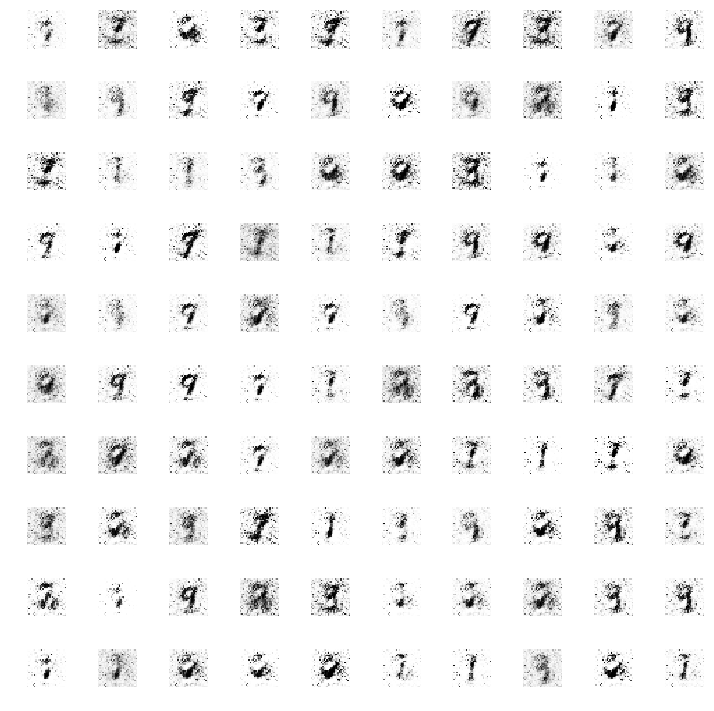

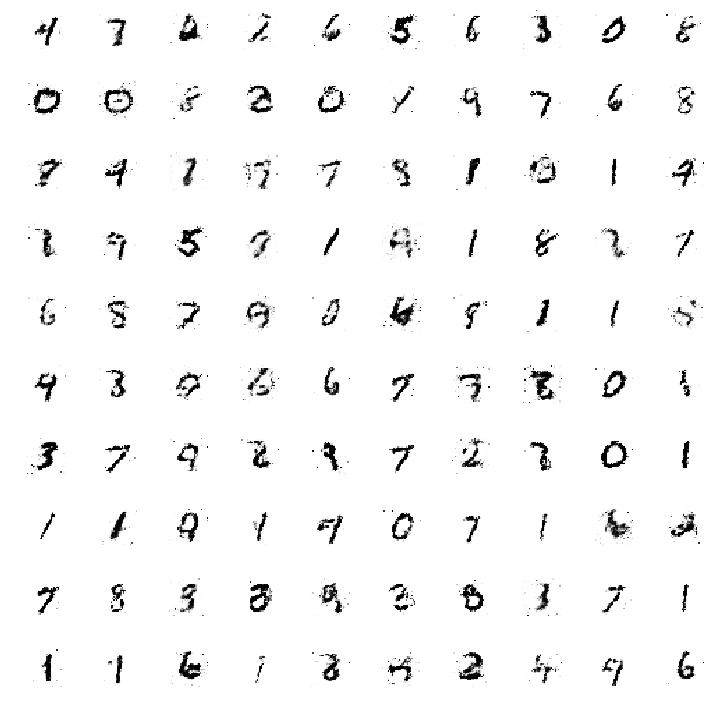

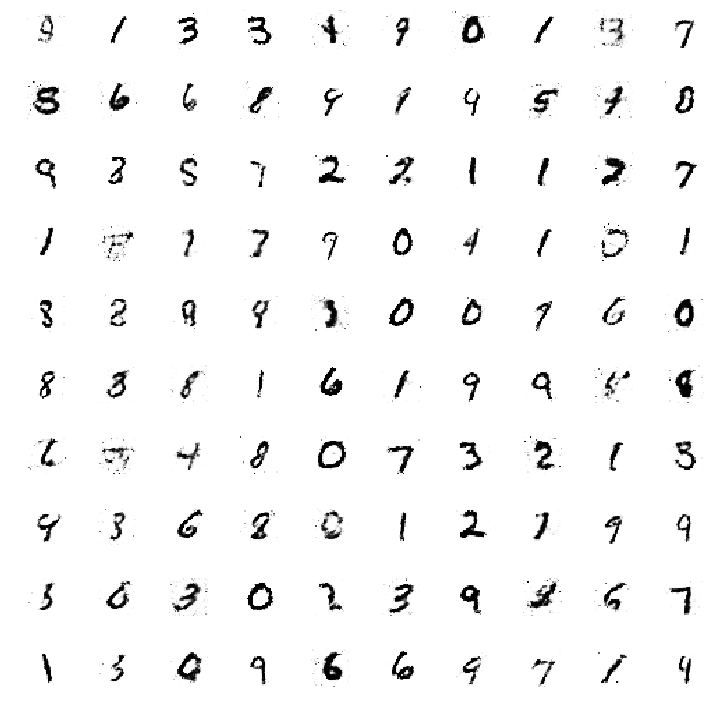

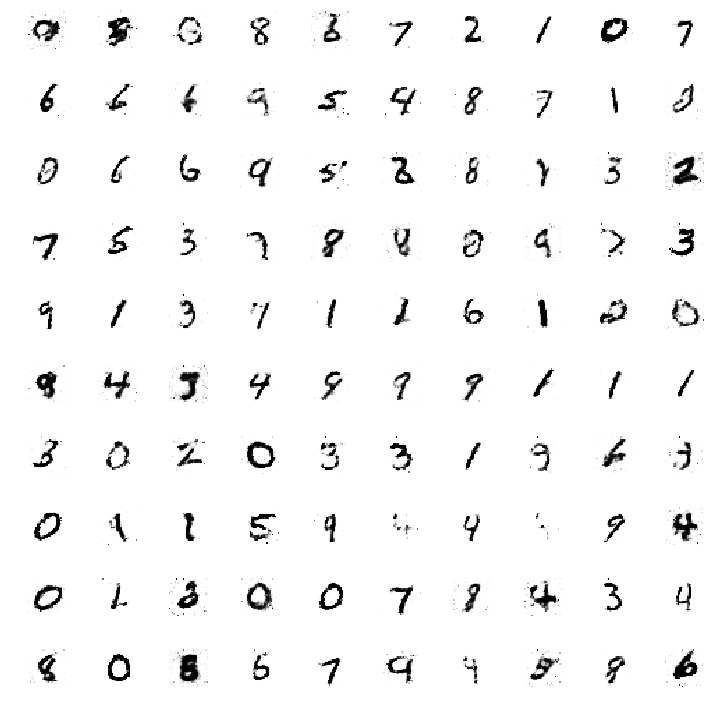

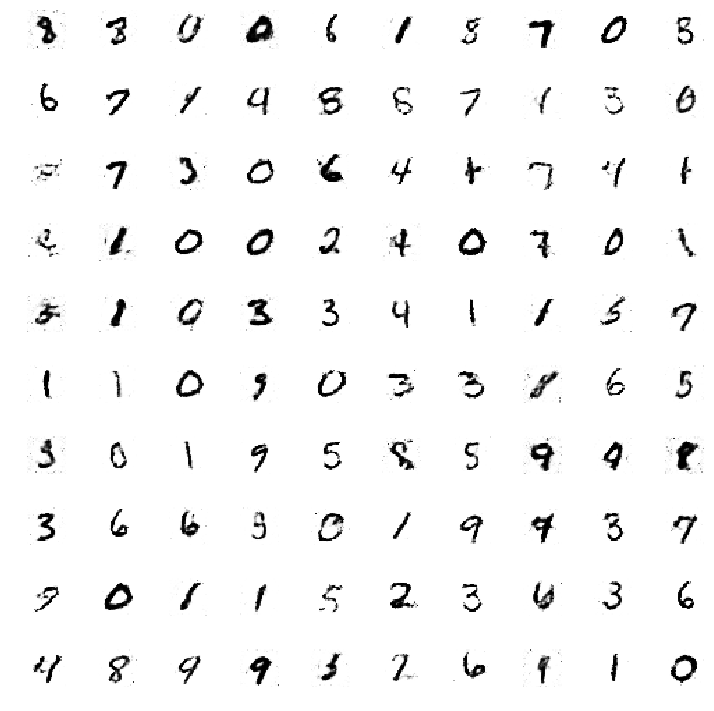

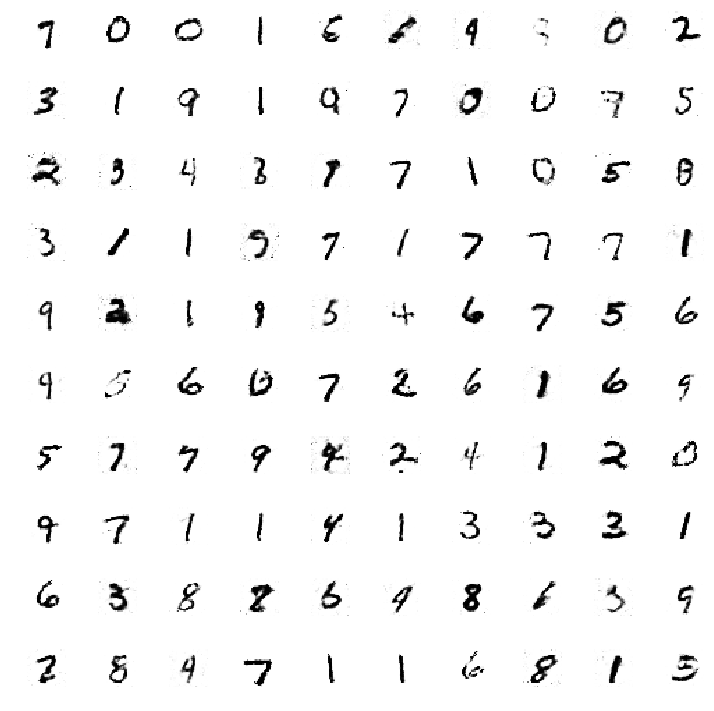

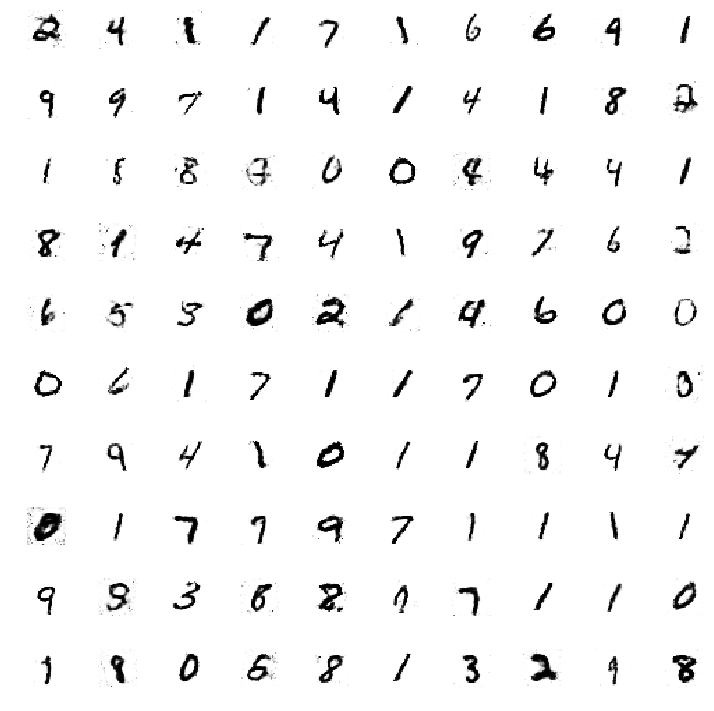

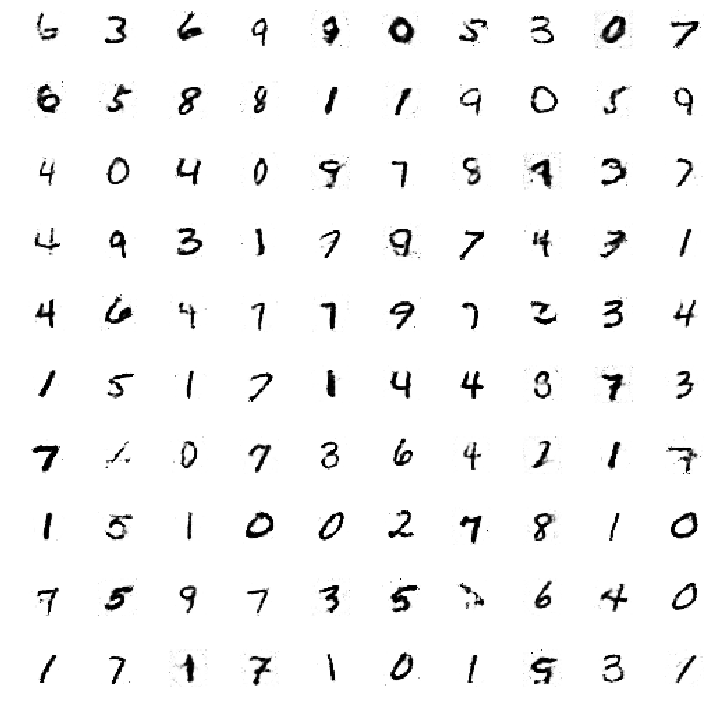

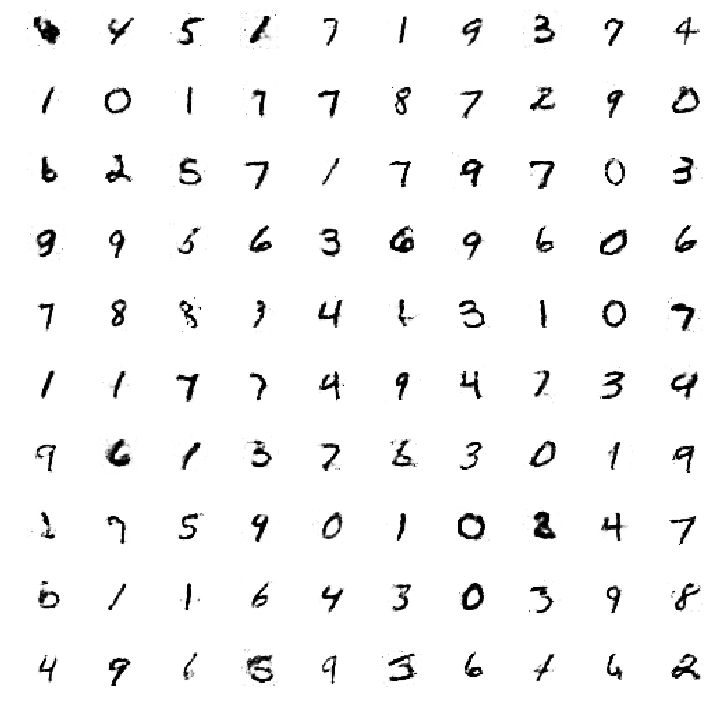

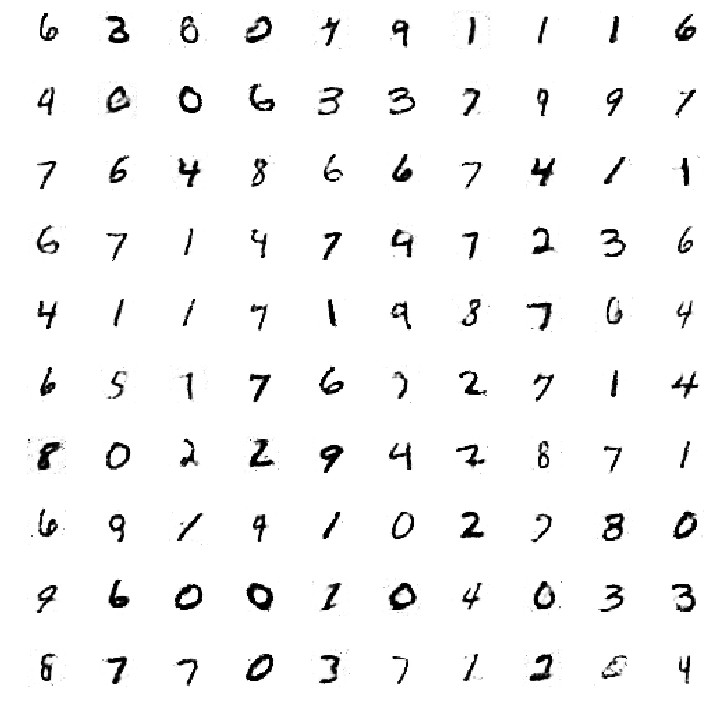

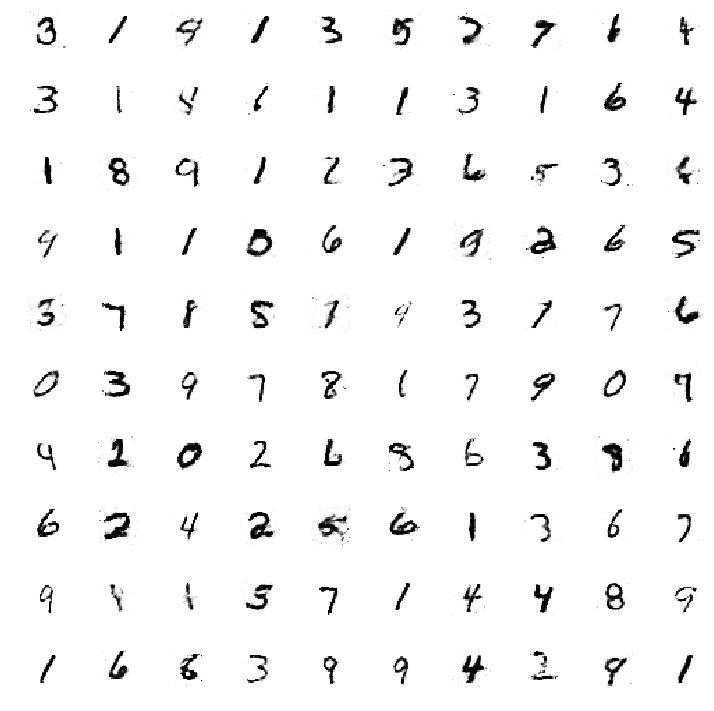

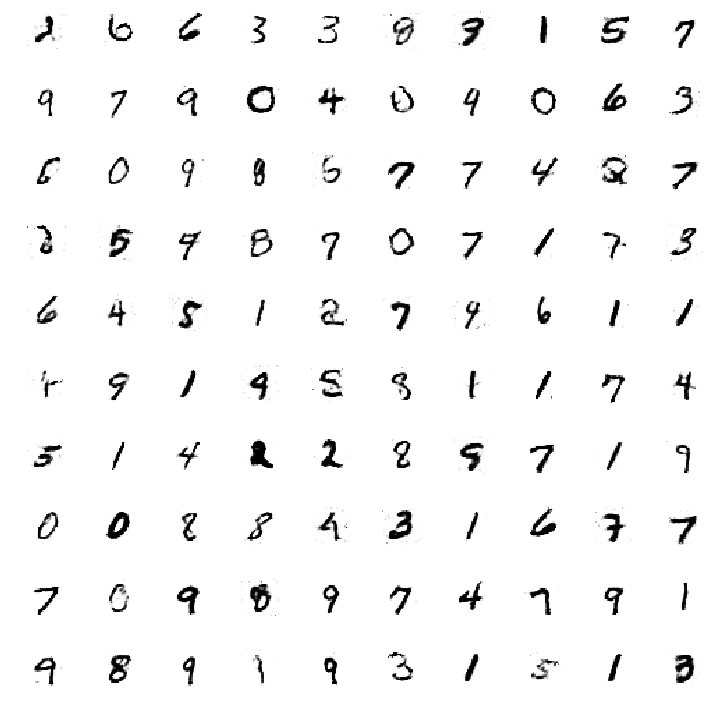

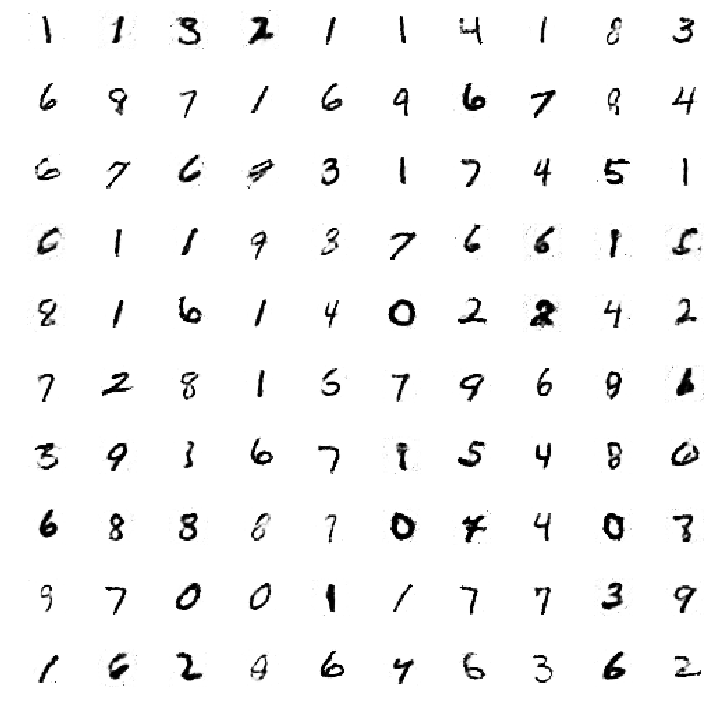

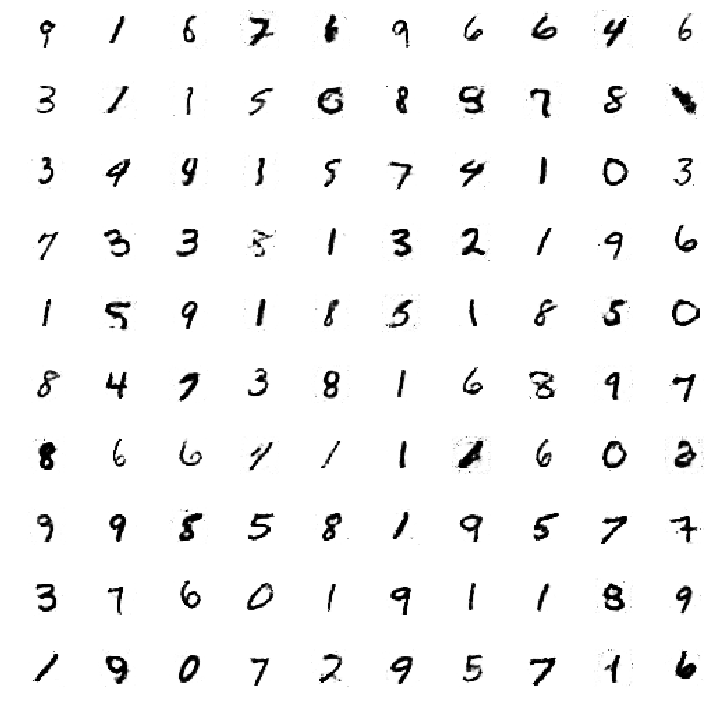

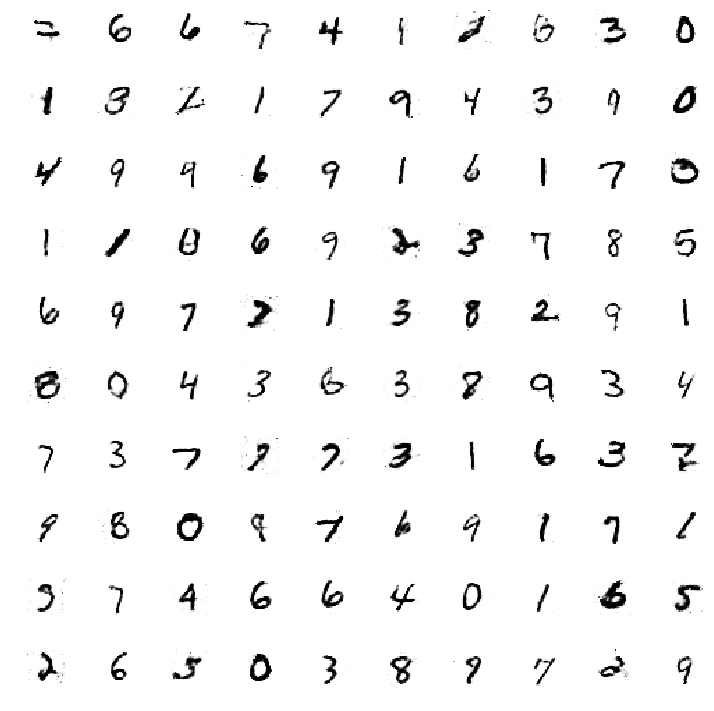

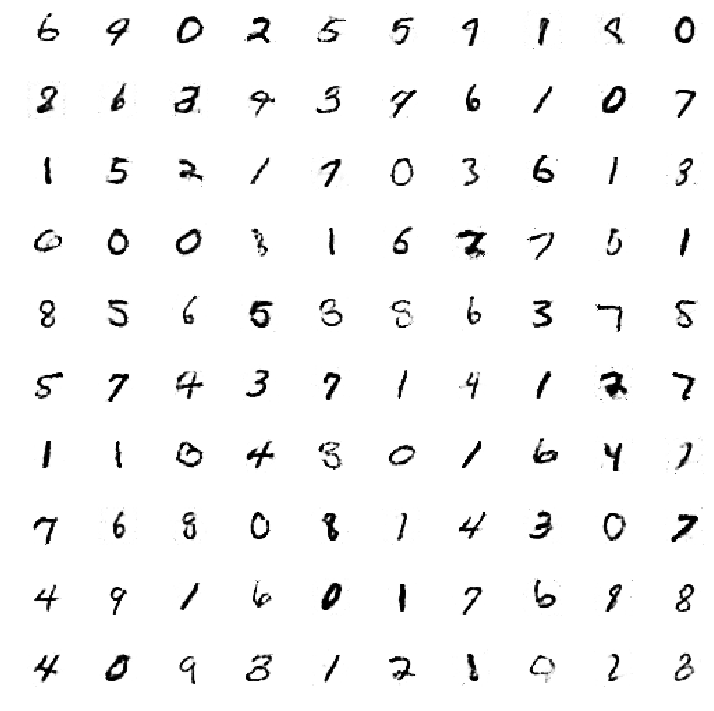

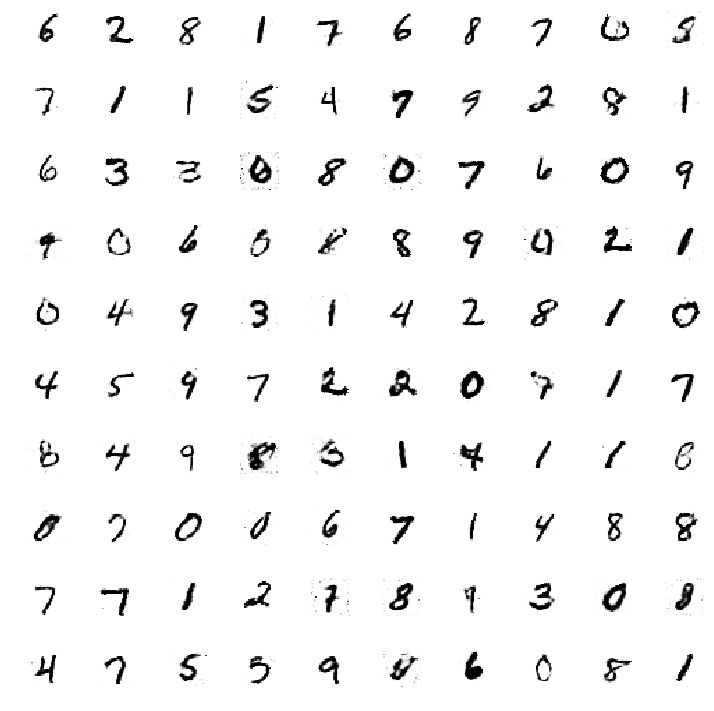

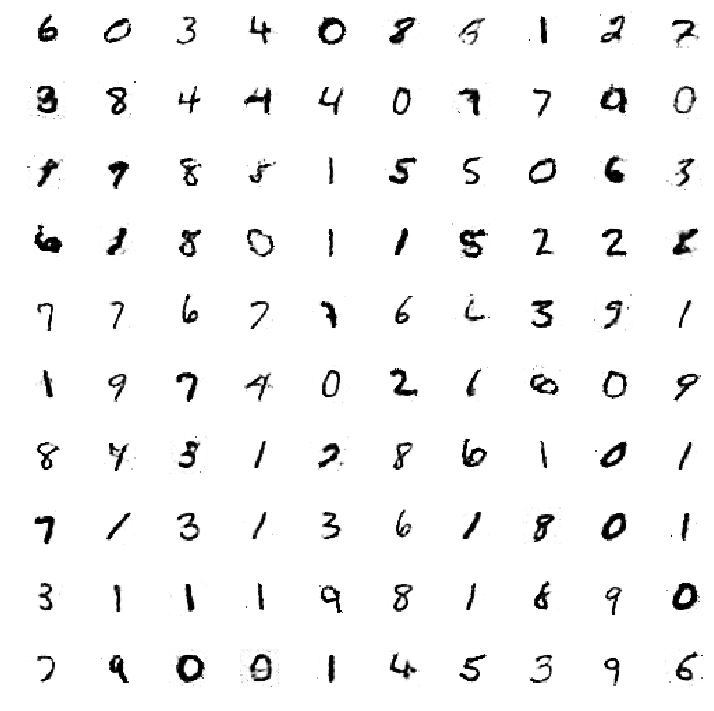

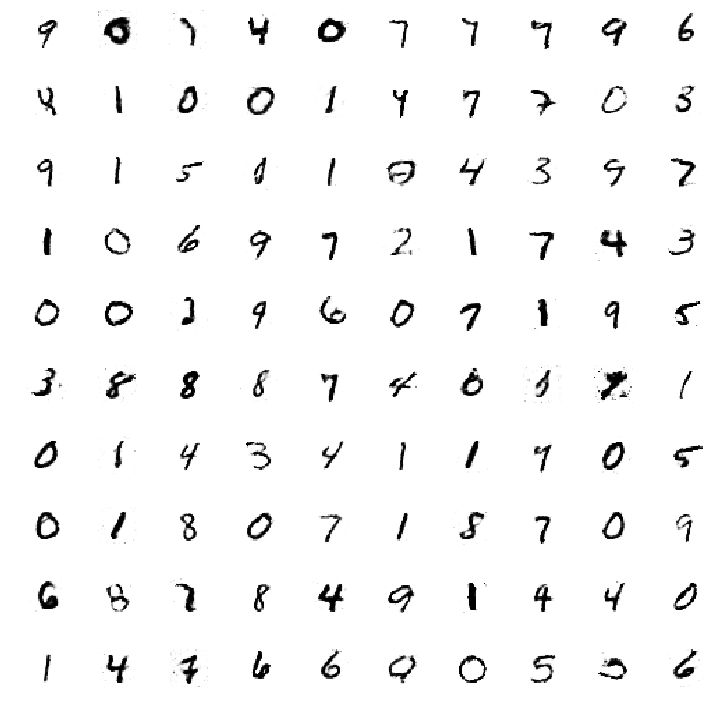

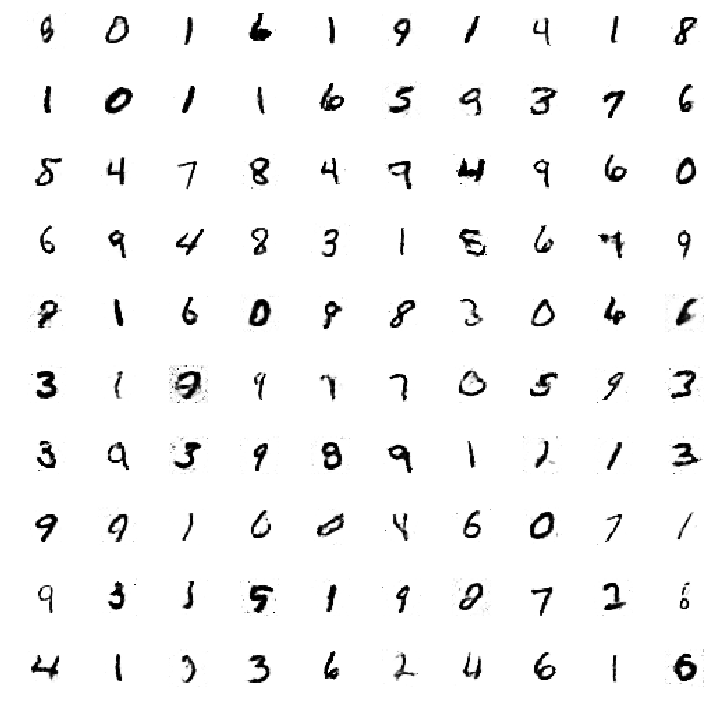

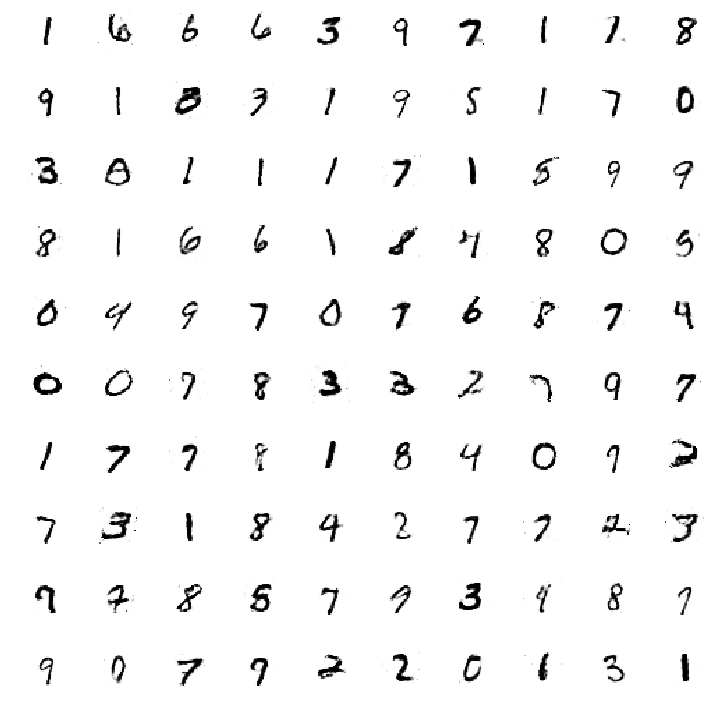

In [31]:
simple_train(400, 128)

## 4. Deep Convolutional Generative Adversarial Networks


Convolutional networks (CNNs) has seen huge adoption in computer vision applications. Comparatively, unsupervised learning with CNNs has received less attention.  **Deep convolutional generative adversarial networks (DCGANs)**, demonstrate how unsupervised learning can be performed using CNNs. 

### 4.1 Why DCGAN?

GANs are difficult to optimize and training is unstable. The network architectures must be carefully designed and the balance between the generator and discriminator must be carefully maintained for training to converge.


Many GAN models suffer the following major problems:

* Non-convergence: the model parameters oscillate, destabilize and never converge,
* Mode collapse: the generator collapses which produces limited varieties of samples,
* Diminished gradient: the discriminator gets too successful that the generator gradient vanishes and learns nothing,
* Unbalance between the generator and discriminator causing overfitting, and
* Highly sensitive to the hyperparameter selections.

### 4.2 What is DCGAN?

A DCGAN is a direct extension of the GAN, except that it explicitly uses convolutional and convolutional-transpose layers in the discriminator and generator, respectively. 

* The discriminator is made up of strided convolution layers, batch norm layers, and LeakyReLU activations. The input is a 3x64x64 input image and the output is a scalar probability that the input is from the real data distribution.

* The generator is comprised of convolutional-transpose layers, batch norm layers, and ReLU activations. The input is a latent vector, z, that is drawn from a standard normal distribution and the output is a 3x64x64 RGB image. The strided conv-transpose layers allows the latent vector to be transformed into a volume with the same shape as an image. 

Deep Convolutional Generative Adversarial Networks works in the opposite direction of the image classifier (CNN). 
* CNN transforms an image to a class label (list of probabilities). 
* DCGAN generates an image from random parameters.

<p align="center">
    <img src="dcgan_ex1.png" alt="neofetch" align="middle" >
</p>


The core to the DCGAN architecture uses a standard CNN architecture on the discriminative model. 

<p align="center">
    <img src="DCGAN.png" alt="neofetch" align="middle" width="800px">
</p>

<p align="center">
    <img src="dcgan_genflow.png" alt="neofetch" align="middle" >
</p>



### 4.3 Hands-on with Deep Convolutional Generative Adversarial networks

In [1]:
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')

# Scaling the range of the image to [-1, 1]
# Because we are using tanh as the activation function in the last layer of the generator
# and tanh restricts the weights in the range [-1, 1]
X_train = (X_train - 127.5) / 127.5

X_train.shape

(60000, 28, 28, 1)

In [4]:
generator = Sequential([
        Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)),
        BatchNormalization(),
        Reshape((7,7,128)),
        UpSampling2D(),
        Convolution2D(64, 5, 5, border_mode='same', activation=LeakyReLU(0.2)),
        BatchNormalization(),
        UpSampling2D(),
        Convolution2D(1, 5, 5, border_mode='same', activation='tanh')
    ])

/usr/local/lib/python3.6/site-packages/keras/activations.py:186: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation=<keras.lay..., padding="same")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (5, 5), activation="tanh", padding="same")`
  if __name__ == '__main__':


In [5]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
batch_normalization_1 (Batch (None, 6272)              25088     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 64)        0         
__________

In [6]:
discriminator  = Sequential([
        Convolution2D(64, 5, 5, subsample=(2,2), input_shape=(28,28,1), border_mode='same', activation=LeakyReLU(0.2)),
        Dropout(0.3),
        Convolution2D(128, 5, 5, subsample=(2,2), border_mode='same', activation=LeakyReLU(0.2)),
        Dropout(0.3),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(28, 28, 1..., activation=<keras.lay..., strides=(2, 2), padding="same")`
  
/usr/local/lib/python3.6/site-packages/keras/activations.py:186: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), activation=<keras.lay..., strides=(2, 2), padding="same")`
  after removing the cwd from sys.path.


In [7]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
_________________________________________________________________


In [8]:
generator.compile(loss='binary_crossentropy', optimizer=Adam())
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

In [9]:
discriminator.trainable = False
ganInput = Input(shape=(100,))
# getting the output of the generator
# and then feeding it to the discriminator
# new model = D(G(input))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(input=ganInput, output=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


In [10]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [11]:
def train(epoch=10, batch_size=128):
    batch_count = X_train.shape[0] // batch_size
    
    for i in range(epoch):
        for j in tqdm(range(batch_count)):
            # Input for the generator
            noise_input = np.random.rand(batch_size, 100)
            
            # getting random images from X_train of size=batch_size 
            # these are the real images that will be fed to the discriminator
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
            
            # these are the predicted images from the generator
            predictions = generator.predict(noise_input, batch_size=batch_size)
            
            # the discriminator takes in the real images and the generated images
            X = np.concatenate([predictions, image_batch])
            
            # labels for the discriminator
            y_discriminator = [0]*batch_size + [1]*batch_size
            
            # Let's train the discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_discriminator)
            
            # Let's train the generator
            noise_input = np.random.rand(batch_size, 100)
            y_generator = [1]*batch_size
            discriminator.trainable = False
            gan.train_on_batch(noise_input, y_generator)

In [12]:
train(30,128)

100%|██████████| 468/468 [00:32<00:00, 14.37it/s]


In [13]:
generator.save_weights('gen_30_scaled_images.h5')
discriminator.save_weights('dis_30_scaled_images.h5')

In [15]:
generator.load_weights('gen_30_scaled_images.h5')
discriminator.load_weights('dis_30_scaled_images.h5')

In [16]:
def plot_output():
    try_input = np.random.rand(100, 100)
    preds = generator.predict(try_input)

    plt.figure(figsize=(10,10))
    for i in range(preds.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(preds[i, :, :, 0], cmap='gray')
        plt.axis('off')
    
    # tight_layout minimizes the overlap between 2 sub-plots
    plt.tight_layout()

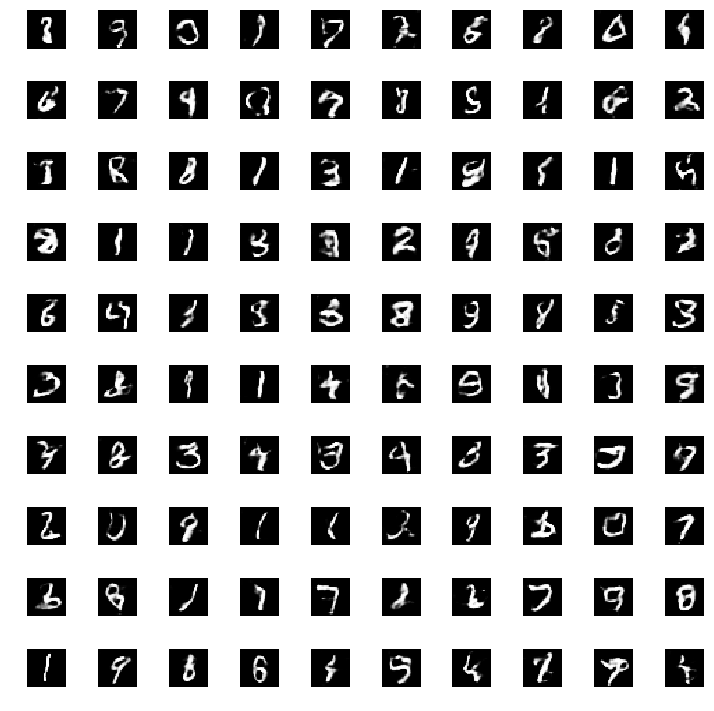

In [17]:
plot_output()